# Implementation of Logistic and Ridge Regression From Scratch

STEPS 
- 1. Import required libraries (not allowed: sklearn or any other libraries with in-built functions that help to implement ML)
- 2. Read, preprocess and print main statistic about the dataset (your code from Part I can be reused). 
- 3. Convert features with string datatype to categorical (species, island, sex) 
- 4. Normalize non-categorical features (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g) 
    - a. Find the min and max values for each column 
    - b. Rescale dataset columns to the range from 0 to 1 
- 5 Choose your target Y. For this dataset, there is a number of options: 
    - a. We can use binary classifier to predict which gender a penguin belongs to (female or male). In this case column sex can be used as Y (target) 
    - b. We can use binary classifier to predict if a penguin location is Adélie island or not. In this case column island can be used as Y (target)  
    
- 6 Create the data matrices for X (input) and Y (target) in a shape X = 𝑁 x 𝑑 and Y = 𝑁 x 1, where 𝑁 is a number of data samples and 𝑑 is a number of features.  
- 7. Divide the dataset into training and test, as 80% - training, 20% - testing dataset. 
- 8. Print the shape of your X_train, y_train, X_test, y_test 
- 9. Recommended structure of your code to define linear and ridge regression:

    

Step 1 :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 2 :  Selecting diamond data set for this analysis

In [70]:
amazon_df = pd.read_csv("datasets/diamonds.csv", index_col=[0])

In [71]:
amazon_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [72]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [73]:
amazon_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [74]:
amazon_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [75]:
amazon_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [76]:
amazon_df = amazon_df.dropna();

In [77]:
amazon_df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [78]:
amazon_df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Step - 3 :

In [79]:
def normalise_data(value):
    min_val = min(value)
    max_val = max(value)
    norm_value = (value - min_val)/(max_val-min_val)
    return norm_value

amazon_df["price"] = normalise_data(amazon_df['price'])
amazon_df["carat"] = normalise_data(amazon_df['carat'])

In [80]:
amazon_df["x"] = normalise_data(amazon_df['x'])
amazon_df["y"] = normalise_data(amazon_df['y'])
amazon_df["z"] = normalise_data(amazon_df['z'])

Step -4. 

In [81]:
 target = amazon_df['price']

In [82]:
target

1        0.000000
2        0.000000
3        0.000054
4        0.000433
5        0.000487
           ...   
53936    0.131427
53937    0.131427
53938    0.131427
53939    0.131427
53940    0.131427
Name: price, Length: 53940, dtype: float64

Step 5:

In [83]:
input_data = amazon_df[['carat','x','y','z']]

In [84]:
input_data

,carat,x,y,z
1,0.006237,0.367784,0.067572,0.076415
2,0.002079,0.362197,0.065195,0.072642
3,0.006237,0.377095,0.069100,0.072642
4,0.018711,0.391061,0.071817,0.082704
5,0.022869,0.404097,0.073854,0.086478
...,...,...,...,...
53936,0.108108,0.535382,0.097793,0.110063
53937,0.108108,0.529795,0.097623,0.113522
53938,0.103950,0.527002,0.096435,0.111950
53939,0.137214,0.572626,0.103905,0.117610


Step : 6 

In [85]:
np.random.seed(50)
test_train_split = np.random.rand(len(input_data)) <= 0.8
X_train = input_data[test_train_split]
X_test = input_data[~test_train_split]
#data_y = np.random.rand(len(y)) <= 0.8
y_train = target[test_train_split]
y_test = target[~test_train_split]

Step : 7

In [86]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(43323, 4) (10617, 4) (43323,) (10617,)


In [87]:
len(y_train)

43323

In [88]:
X_train.shape[0]

43323

Step 8 :

In [89]:
class LinearRegression() :
    def __init__(self, learning_rate, iterations) :  
        
        #Hyper parameters 
        # Learning rate and no of iterations
        
        self.learning_rate = learning_rate;
        self.iterations = iterations;
        # set arrays for cost of every iterations
        self.costs = [];
        # initialize variables.
        self.weights = 0 ;
        self.bias = 0 ;
        
        
    # train the model 
        
    def fit(self, X, Y) : 
        
        
        # initialize weights and bias
        self.bias = 0 ; 
        self.weights = np.zeros(X.shape[1]);
        
        
        
        # iterate for no of iterations to calculate optimal weight and bias
        
        for j in range(self.iterations):
            # Call cost function for each new weight and bias
            cost = self.cost_function(X, Y);
            # added new cost to a array
            self.costs.append(cost); 
            
            # call gradient descent function to get updated gradients 
            w_grad, b_grad = self.gradient_descent_function(X, Y, self.weights, self.bias);
        
            # update new weight and bias
            new_learning_weight = self.learning_rate*w_grad;
            self.weights = self.weights - new_learning_weight;
            new_learning_bias = self.learning_rate*b_grad;
            self.bias = self.bias - new_learning_bias;
            print('costs of iteration ', j ," is : ", cost)   
        print("Weights"  , self.weights)
        return self.costs
    
    # cost function to calculate loss 
    def cost_function(self,X, Y):
        multiply_weight = X.dot(self.weights);
        predicted_val  = (multiply_weight + self.bias);
        loss_value =   predicted_val - Y ;
        numer = np.sum(loss_value ** 2) ;
        lenght_feat = len(Y);
        denom = (2*lenght_feat);
    
        cost =  numer/denom ; 
        return cost
    
    # gradient descent to calculate graduent for each iteration
    def gradient_descent_function(self , X, Y, w, b):
        
        
        # calculate prediction value for current weight and bias
        prediction_val = X.dot(w) + b;
        
        # calculate the cost with current weight and bias
        curr_cost = prediction_val - Y;
        top_samp = X.shape[0];
        # calculate gradient descent
        Multiple_input_tran_loss = X.T.dot(curr_cost) ;
        new_w_grad = Multiple_input_tran_loss / top_samp;
        sum_of_loss = np.sum(curr_cost) ;
        new_bi_grad =  sum_of_loss/ top_samp ;
        
        # return gradient of weight and bias
            
        return new_w_grad, new_bi_grad
    
    # Predict test data based on updated weight and bias
    def predict( self, X ) : 
        prediction_Val = X.dot(self.weights ) ;
        predicted =  prediction_Val + self.bias;
        
        return np.array(predicted)

    


        

In [90]:
 
model = LinearRegression(learning_rate = 0.5, iterations = 1000)

model.fit(X_train, y_train)    


Y_pred = model.predict(X_test)    


costs of iteration  0  is :  0.042116676167181295
costs of iteration  1  is :  0.02323084766451444
costs of iteration  2  is :  0.02082926099092203
costs of iteration  3  is :  0.02030604989184928
costs of iteration  4  is :  0.020000662688266134
costs of iteration  5  is :  0.019724245268399637
costs of iteration  6  is :  0.019455255644621767
costs of iteration  7  is :  0.019191174046208726
costs of iteration  8  is :  0.01893164446616824
costs of iteration  9  is :  0.01867655807658157
costs of iteration  10  is :  0.0184258353200921
costs of iteration  11  is :  0.01817940111681682
costs of iteration  12  is :  0.01793718202604976
costs of iteration  13  is :  0.017699105904246542
costs of iteration  14  is :  0.017465101847131407
costs of iteration  15  is :  0.01723510016443009
costs of iteration  16  is :  0.017009032358631687
costs of iteration  17  is :  0.016786831104522823
costs of iteration  18  is :  0.016568430229118553
costs of iteration  19  is :  0.016353764691942066


costs of iteration  161  is :  0.005075258540449148
costs of iteration  162  is :  0.0050569462983211496
costs of iteration  163  is :  0.005038945085950878
costs of iteration  164  is :  0.005021249580810346
costs of iteration  165  is :  0.005003854551463083
costs of iteration  166  is :  0.004986754856005174
costs of iteration  167  is :  0.00496994544053296
costs of iteration  168  is :  0.004953421337636976
costs of iteration  169  is :  0.00493717766492165
costs of iteration  170  is :  0.004921209623550356
costs of iteration  171  is :  0.004905512496815343
costs of iteration  172  is :  0.00489008164873217
costs of iteration  173  is :  0.004874912522658159
costs of iteration  174  is :  0.004860000639934527
costs of iteration  175  is :  0.004845341598551724
costs of iteration  176  is :  0.004830931071837657
costs of iteration  177  is :  0.004816764807168312
costs of iteration  178  is :  0.004802838624700485
costs of iteration  179  is :  0.004789148416126177
costs of itera

costs of iteration  326  is :  0.004052245014445105
costs of iteration  327  is :  0.004051056832104486
costs of iteration  328  is :  0.004049886700742491
costs of iteration  329  is :  0.0040487343119544284
costs of iteration  330  is :  0.004047599362613632
costs of iteration  331  is :  0.004046481554781128
costs of iteration  332  is :  0.004045380595616864
costs of iteration  333  is :  0.004044296197292427
costs of iteration  334  is :  0.004043228076905286
costs of iteration  335  is :  0.004042175956394485
costs of iteration  336  is :  0.004041139562457774
costs of iteration  337  is :  0.004040118626470183
costs of iteration  338  is :  0.00403911288440396
costs of iteration  339  is :  0.004038122076749898
costs of iteration  340  is :  0.0040371459484400025
costs of iteration  341  is :  0.0040361842487714825
costs of iteration  342  is :  0.004035236731332043
costs of iteration  343  is :  0.004034303153926455
costs of iteration  344  is :  0.004033383278504389
costs of i

costs of iteration  490  is :  0.0039725761111040385
costs of iteration  491  is :  0.003972383781512855
costs of iteration  492  is :  0.003972192544215009
costs of iteration  493  is :  0.003972002381023259
costs of iteration  494  is :  0.003971813274061502
costs of iteration  495  is :  0.003971625205759465
costs of iteration  496  is :  0.003971438158847456
costs of iteration  497  is :  0.003971252116351228
costs of iteration  498  is :  0.003971067061586918
costs of iteration  499  is :  0.003970882978156083
costs of iteration  500  is :  0.003970699849940811
costs of iteration  501  is :  0.003970517661098917
costs of iteration  502  is :  0.003970336396059234
costs of iteration  503  is :  0.003970156039516965
costs of iteration  504  is :  0.003969976576429129
costs of iteration  505  is :  0.0039697979920100815
costs of iteration  506  is :  0.003969620271727103
costs of iteration  507  is :  0.00396944340129608
costs of iteration  508  is :  0.0039692673666772435
costs of i

costs of iteration  652  is :  0.003948455137063593
costs of iteration  653  is :  0.003948325861818015
costs of iteration  654  is :  0.003948196680301657
costs of iteration  655  is :  0.003948067591398445
costs of iteration  656  is :  0.003947938594011299
costs of iteration  657  is :  0.003947809687061797
costs of iteration  658  is :  0.003947680869489863
costs of iteration  659  is :  0.003947552140253452
costs of iteration  660  is :  0.003947423498328238
costs of iteration  661  is :  0.003947294942707314
costs of iteration  662  is :  0.003947166472400893
costs of iteration  663  is :  0.0039470380864360145
costs of iteration  664  is :  0.003946909783856258
costs of iteration  665  is :  0.003946781563721461
costs of iteration  666  is :  0.003946653425107434
costs of iteration  667  is :  0.003946525367105694
costs of iteration  668  is :  0.0039463973888231975
costs of iteration  669  is :  0.003946269489382064
costs of iteration  670  is :  0.003946141667919334
costs of i

costs of iteration  815  is :  0.003928169582450033
costs of iteration  816  is :  0.003928048492371372
costs of iteration  817  is :  0.0039279274340191335
costs of iteration  818  is :  0.00392780640732035
costs of iteration  819  is :  0.003927685412203189
costs of iteration  820  is :  0.003927564448596947
costs of iteration  821  is :  0.003927443516432015
costs of iteration  822  is :  0.003927322615639869
costs of iteration  823  is :  0.003927201746153053
costs of iteration  824  is :  0.0039270809079051516
costs of iteration  825  is :  0.00392696010083078
costs of iteration  826  is :  0.003926839324865563
costs of iteration  827  is :  0.003926718579946123
costs of iteration  828  is :  0.0039265978660100505
costs of iteration  829  is :  0.003926477182995904
costs of iteration  830  is :  0.0039263565308431825
costs of iteration  831  is :  0.003926235909492309
costs of iteration  832  is :  0.003926115318884623
costs of iteration  833  is :  0.003925994758962355
costs of i

costs of iteration  977  is :  0.003908935938436721
costs of iteration  978  is :  0.003908819488676229
costs of iteration  979  is :  0.0039087030659689485
costs of iteration  980  is :  0.003908586670304624
costs of iteration  981  is :  0.003908470301673074
costs of iteration  982  is :  0.003908353960064184
costs of iteration  983  is :  0.003908237645467909
costs of iteration  984  is :  0.00390812135787427
costs of iteration  985  is :  0.003908005097273358
costs of iteration  986  is :  0.003907888863655324
costs of iteration  987  is :  0.003907772657010389
costs of iteration  988  is :  0.00390765647732883
costs of iteration  989  is :  0.003907540324600993
costs of iteration  990  is :  0.00390742419881728
costs of iteration  991  is :  0.0039073080999681535
costs of iteration  992  is :  0.003907192028044138
costs of iteration  993  is :  0.0039070759830358145
costs of iteration  994  is :  0.003906959964933816
costs of iteration  995  is :  0.003906843973728841
costs of ite

Step 9 :   Mean Squared Error

In [91]:
print("Mean squared Error" , np.square(np.subtract(y_test,Y_pred)).mean() ) 

Mean squared Error 0.007953983923945106


Step 10 :  Plot predicted vs Actual value

Text(0, 0.5, 'Predicted value ')

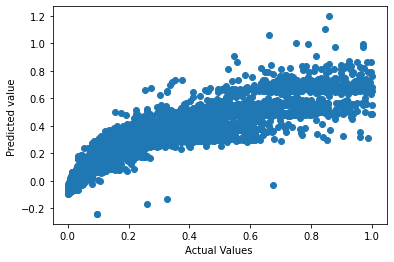

In [92]:
plt.scatter(y_test, Y_pred)
plt.xlabel('Actual Values ')
plt.ylabel('Predicted value ')


R- Squared value

In [93]:
def r_squared_value(y_pred, y):
    
    num = np.sum((y_pred - y) ** 2)
    denom = np.sum((y-y.mean()) ** 2)
    r_squared = 1 - (num / denom)
    return r_squared

In [94]:
Rsquared_value = r_squared_value ( Y_pred , y_test)

In [95]:
print('Accuracy of Model , R-Squared Value : ', Rsquared_value)

Accuracy of Model , R-Squared Value :  0.8308754603024098


## Part 4

In [68]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_lambda ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_lambda = l2_lambda
    #####################################################################
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape

        # weight initialization        
        self.W = np.zeros( self.n )

        self.b = 0        
        self.X = X        
        self.Y = Y

        self.W = np.zeros(self.n)
        loss =[]
        for i in range(self.iterations):
            #print(i)
            # Call gradient_descent function
           
            h = self.predict(self.X)
         
            w,b = self.gradient_descent(self.X,self.Y , h)
            # Updating the parameters.
            self.W -= self.learning_rate * w
            self.b -= self.learning_rate * b
#             print(self.b)
            
            # Call cost function and keep it in an array , e.g. loss.append() 
            cost_cal = self.cost(h,self.Y)
            #print('loss value over each iteration: {}'.format(cost_cal))
            
            loss.append(cost_cal)
            print('costs of iteration ', i ," is : ", cost_cal)
        print('Weight Vector: {}'.format(self.W))
        
        return loss
    #####################################################################################
    def cost(self, h, y):
        #Implement parameter estimation for ridge regression
        a = (self.l2_lambda / (2*self.m)) # lambda value divived by 2m
        b = np.sum(np.square(self.W)) # weightage value
        
        j_lambda = a*b # calculating lambda
        
        ## cost function
        c = 1/(2*self.m)
        d = ((h - self.Y).T).dot(h - self.Y)
        
        jw =  c * d + j_lambda
        return jw
     #################################################################################
#     #Method for calculating the gradients
    def gradient_descent(self,X, Y, h): #self, X, h, y

        #gd =np.dot(X.T, (h - y)) / y.shape[0]
        # m-> number of training length.
        ## m = X.shape[0]
        
        ## calculating weights
        input_t = self.X.T
        pred_t = self.Y - h
        w_1 = -( 2 * (input_t).dot(pred_t)
        #################################         
        w_2 =  2 * self.l2_lambda * self.W 
        w = ( w_1 + w_2 ) / self.m    
                 
        # calculating bias
        b = - 2 * np.sum( self.Y - h ) / self.m

        return w, b
    #############################################################################################
    def predict( self, X): 
        final = X.dot( self.W ) + self.b
        return final

In [97]:
model = RidgeRegression(learning_rate = 0.05, iterations = 1000,l2_lambda = 2)

model.fit(X_train, y_train)    

Y_pred_r = model.predict(X_test)

costs of iteration  0  is :  0.04211668040603066
costs of iteration  1  is :  0.036864697845162865
costs of iteration  2  is :  0.032898547934668086
costs of iteration  3  is :  0.029899960396798986
costs of iteration  4  is :  0.027629455510989928
costs of iteration  5  is :  0.02590683878802788
costs of iteration  6  is :  0.02459652436698747
costs of iteration  7  is :  0.02359649174019476
costs of iteration  8  is :  0.02282997634244781
costs of iteration  9  is :  0.02223921721125329
costs of iteration  10  is :  0.021780752471230694
costs of iteration  11  is :  0.021421879464577506
costs of iteration  12  is :  0.021137991208753832
costs of iteration  13  is :  0.020910572238525858
costs of iteration  14  is :  0.020725690595708394
costs of iteration  15  is :  0.02057286314068306
costs of iteration  16  is :  0.020444201766455623
costs of iteration  17  is :  0.02033377097524799
costs of iteration  18  is :  0.020237104492887705
costs of iteration  19  is :  0.02015084154972795

costs of iteration  171  is :  0.013534055429136231
costs of iteration  172  is :  0.013501461711762692
costs of iteration  173  is :  0.013468980095420628
costs of iteration  174  is :  0.01343661019423087
costs of iteration  175  is :  0.013404351623642535
costs of iteration  176  is :  0.01337220400042849
costs of iteration  177  is :  0.013340166942680769
costs of iteration  178  is :  0.013308240069806064
costs of iteration  179  is :  0.013276423002521178
costs of iteration  180  is :  0.013244715362848505
costs of iteration  181  is :  0.013213116774111546
costs of iteration  182  is :  0.013181626860930454
costs of iteration  183  is :  0.013150245249217528
costs of iteration  184  is :  0.013118971566172807
costs of iteration  185  is :  0.013087805440279597
costs of iteration  186  is :  0.013056746501300082
costs of iteration  187  is :  0.013025794380270916
costs of iteration  188  is :  0.012994948709498827
costs of iteration  189  is :  0.012964209122556258
costs of itera

costs of iteration  331  is :  0.009517963362531105
costs of iteration  332  is :  0.009499178904586085
costs of iteration  333  is :  0.009480459013020338
costs of iteration  334  is :  0.009461803465582869
costs of iteration  335  is :  0.009443212040787715
costs of iteration  336  is :  0.009424684517911347
costs of iteration  337  is :  0.009406220676990025
costs of iteration  338  is :  0.00938782029881719
costs of iteration  339  is :  0.009369483164940852
costs of iteration  340  is :  0.009351209057661004
costs of iteration  341  is :  0.009332997760027021
costs of iteration  342  is :  0.009314849055835081
costs of iteration  343  is :  0.009296762729625612
costs of iteration  344  is :  0.009278738566680702
costs of iteration  345  is :  0.009260776353021567
costs of iteration  346  is :  0.009242875875406004
costs of iteration  347  is :  0.009225036921325843
costs of iteration  348  is :  0.00920725927900444
costs of iteration  349  is :  0.009189542737394139
costs of itera

costs of iteration  499  is :  0.007117366557308779
costs of iteration  500  is :  0.007106829733858473
costs of iteration  501  is :  0.007096329086913773
costs of iteration  502  is :  0.007085864491949875
costs of iteration  503  is :  0.007075435824870626
costs of iteration  504  is :  0.007065042962007053
costs of iteration  505  is :  0.007054685780115886
costs of iteration  506  is :  0.007044364156378086
costs of iteration  507  is :  0.007034077968397401
costs of iteration  508  is :  0.007023827094198903
costs of iteration  509  is :  0.007013611412227533
costs of iteration  510  is :  0.007003430801346661
costs of iteration  511  is :  0.006993285140836649
costs of iteration  512  is :  0.006983174310393398
costs of iteration  513  is :  0.006973098190126948
costs of iteration  514  is :  0.006963056660560017
costs of iteration  515  is :  0.006953049602626615
costs of iteration  516  is :  0.0069430768976706
costs of iteration  517  is :  0.006933138427444283
costs of itera

costs of iteration  660  is :  0.005812298529057692
costs of iteration  661  is :  0.005806239013708612
costs of iteration  662  is :  0.005800200263511576
costs of iteration  663  is :  0.005794182206992103
costs of iteration  664  is :  0.005788184772921755
costs of iteration  665  is :  0.005782207890317281
costs of iteration  666  is :  0.005776251488439774
costs of iteration  667  is :  0.005770315496793829
costs of iteration  668  is :  0.005764399845126707
costs of iteration  669  is :  0.005758504463427503
costs of iteration  670  is :  0.005752629281926307
costs of iteration  671  is :  0.005746774231093376
costs of iteration  672  is :  0.005740939241638306
costs of iteration  673  is :  0.005735124244509215
costs of iteration  674  is :  0.0057293291708919196
costs of iteration  675  is :  0.005723553952209108
costs of iteration  676  is :  0.005717798520119531
costs of iteration  677  is :  0.005712062806517198
costs of iteration  678  is :  0.005706346743530549
costs of it

costs of iteration  825  is :  0.005047470276246545
costs of iteration  826  is :  0.005044028171286095
costs of iteration  827  is :  0.005040597822446345
costs of iteration  828  is :  0.005037179189264474
costs of iteration  829  is :  0.005033772231416939
costs of iteration  830  is :  0.00503037690871901
costs of iteration  831  is :  0.005026993181124274
costs of iteration  832  is :  0.0050236210087241774
costs of iteration  833  is :  0.005020260351747542
costs of iteration  834  is :  0.005016911170560091
costs of iteration  835  is :  0.005013573425663978
costs of iteration  836  is :  0.005010247077697323
costs of iteration  837  is :  0.005006932087433743
costs of iteration  838  is :  0.0050036284157818755
costs of iteration  839  is :  0.005000336023784927
costs of iteration  840  is :  0.004997054872620206
costs of iteration  841  is :  0.004993784923598651
costs of iteration  842  is :  0.004990526138164391
costs of iteration  843  is :  0.0049872784778942645
costs of i

costs of iteration  990  is :  0.004612564175967071
costs of iteration  991  is :  0.004610603933941013
costs of iteration  992  is :  0.004608650347879381
costs of iteration  993  is :  0.0046067033948755136
costs of iteration  994  is :  0.004604763052101599
costs of iteration  995  is :  0.0046028292968084
costs of iteration  996  is :  0.004600902106324999
costs of iteration  997  is :  0.00459898145805851
costs of iteration  998  is :  0.004597067329493819
costs of iteration  999  is :  0.004595159698193317
Weight Vector: carat    0.859649
x        0.704377
y        0.128280
z        0.145123
dtype: float64


In [98]:
Rsquared_value = r_squared_value ( Y_pred_r , y_test)

In [100]:
print('Accuracy of Model_r , R-Squared Value_r : ', Rsquared_value)

Accuracy of Model_r , R-Squared Value_r :  0.8020100860841075


Text(0, 0.5, 'Predicted value ')

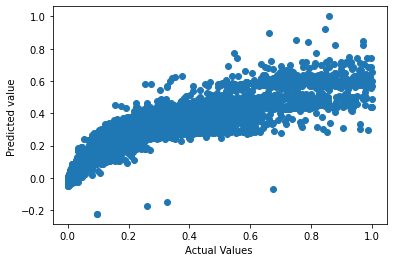

In [102]:
plt.scatter(y_test, Y_pred_r)
plt.xlabel('Actual Values ')
plt.ylabel('Predicted value ')

In [105]:
print("Mean squared Error" , np.square(np.subtract(y_test,Y_pred_r)).mean() ) 

Mean squared Error 0.009311532171535691
